In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import wordcloud


In [2]:
batch_info=pd.read_csv('batch_info.csv')

In [3]:
batch_info.head()

,Time,Email Address,Name,How well you guys are understanding the covered topics ?,Rate our way of training,How well your queries are getting solved,Would you like to join our full time course ?,Would you like to recommend this course to others ?,Would you like to apply for paid internship programme by Softanbees ?,Your suggestion for improving the training programme (Any other queries),Please describe Here,Please describe here,Would you like to recommend this course to others ?.1
0,8/1/20 23:05,deepanjan325@gmail.com,Deepanjan Biswas,5.0,5.0,5.0,Yes,Yes,Yes,NaN,NaN,NaN,NaN
1,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO,No,NaN,NaN
2,8/1/20 23:08,sharmisthaad@gmail.com,Sharmistha Adhikari,1.0,1.0,1.0,Maybe,Yes,Maybe,NaN,NaN,NaN,NaN
3,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well,NaN,NaN,NaN
4,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...,NaN,NaN,NaN


In [4]:
batch_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 13 columns):
 Time                                                                       163 non-null object
Email Address                                                               163 non-null object
Name                                                                        163 non-null object
How well you guys are understanding the covered topics ?                    163 non-null float64
Rate our way of training                                                    163 non-null float64
How well your queries are getting solved                                    163 non-null float64
Would you like to join our full time course ?                               163 non-null object
Would you like to recommend this course to others ?                         67 non-null object
Would you like to apply for paid internship programme by Softanbees  ?      163 non-null object
Your suggestion for improving

# Drop columns and set new column name

In [5]:
batch_info=batch_info.drop(columns=['Please describe Here','Please describe here','Would you like to recommend this course to others ?.1'])

In [6]:
batch_info.columns=['Time','Email','Name','Understand topic(rate 1-5)','Training curriculum(rating)','Query solved(rating)','Join fulltime course?','Recommend course to others?','Apply for paid internship?','Suggestion for imporvement']

# change data type

In [7]:
batch_info['Time']=pd.to_datetime(batch_info['Time'],errors='coerce')

In [8]:
batch_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 10 columns):
Time                           163 non-null datetime64[ns]
Email                          163 non-null object
Name                           163 non-null object
Understand topic(rate 1-5)     163 non-null float64
Training curriculum(rating)    163 non-null float64
Query solved(rating)           163 non-null float64
Join fulltime course?          163 non-null object
Recommend course to others?    67 non-null object
Apply for paid internship?     163 non-null object
Suggestion for imporvement     77 non-null object
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 9.1+ KB


# Finding missing values and handle them

In [9]:
batch_info.isna().sum()

Time                            2
Email                           2
Name                            2
Understand topic(rate 1-5)      2
Training curriculum(rating)     2
Query solved(rating)            2
Join fulltime course?           2
Recommend course to others?    98
Apply for paid internship?      2
Suggestion for imporvement     88
dtype: int64

In [10]:
batch_info['Recommend course to others?'].fillna('maybe',inplace=True)

In [11]:
batch_info['Suggestion for imporvement'].fillna('No suggestions',inplace=True)

In [12]:
batch_info_dropped=batch_info.dropna()


In [13]:
batch_info=batch_info_dropped.reset_index(drop=True)

In [14]:
batch_info

,Time,Email,Name,Understand topic(rate 1-5),Training curriculum(rating),Query solved(rating),Join fulltime course?,Recommend course to others?,Apply for paid internship?,Suggestion for imporvement
0,2020-08-01 23:05:00,deepanjan325@gmail.com,Deepanjan Biswas,5.0,5.0,5.0,Yes,Yes,Yes,No suggestions
1,2020-08-01 23:06:00,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO
2,2020-08-01 23:08:00,sharmisthaad@gmail.com,Sharmistha Adhikari,1.0,1.0,1.0,Maybe,Yes,Maybe,No suggestions
3,2020-08-01 23:10:00,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well
4,2020-08-01 23:10:00,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...
5,2020-08-01 23:10:00,as1973240@gmail.com,Abhishek Singh,3.0,3.0,3.0,Maybe,Maybe,Maybe,No suggestions
6,2020-08-01 23:12:00,pritamsaha075@gmail.com,Pritam Saha,5.0,5.0,5.0,Maybe,Yes,Yes,No suggestions.
7,2020-08-01 23:12:00,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I just want to know that we can build our own ...
8,2020-08-01 23:13:00,anushkaroy2710@gmail.com,Anushka Roy,5.0,5.0,5.0,Yes,Yes,Yes,The free boot camp was really great. Whatever ...
9,2020-08-01 23:15:00,anusree.boni15@gmail.com,Anusree Sengupta,5.0,5.0,5.0,Maybe,Yes,Yes,"This bootcamp was amazing, faculties are so fr..."


# Text classification and word cloud generate

In [15]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import string
import collections

In [16]:
batch=batch_info['Suggestion for imporvement'].str.lower()

In [21]:
batch.head()

0                                       no suggestions
1                                                   no
2                                       no suggestions
3                                          all is well
4    i want to know if you r going to tell us how t...
Name: Suggestion for imporvement, dtype: object

In [22]:
all_suggest=batch.str.split(' ')
all_suggest.head()

0                                    [no, suggestions]
1                                                 [no]
2                                    [no, suggestions]
3                                      [all, is, well]
4    [i, want, to, know, if, you, r, going, to, tel...
Name: Suggestion for imporvement, dtype: object

In [23]:
all_suggestion=[]

for text in all_suggest:
    text = [x.strip(string.punctuation) for x in text]
    all_suggestion.append(text)

all_suggestion[0]

text_suggest = [" ".join(text) for text in all_suggestion]
final_text_suggest = " ".join(text_suggest)
final_text_suggest[:]

"no suggestions no no suggestions all is well i want to know if you r going to tell us how to create app like shankha da present after session no suggestions no suggestions i just want to know that we can build our own app like shankha da present us after session on a dam project on a synthetic data set the free boot camp was really great whatever lessons on r was given was really helpful thank you this bootcamp was amazing faculties are so friendly  well behaved according to me there is no need of improving the training program,this was at its best  as per my suggestion the way you guys are approaching is really good and i am quite sure you will carry on this quality of training in future al the best everything was smooth so far its good after all its a very great and very helpful session for me....mainly as a friendly teaching process....thanking you surya da(rittik da,sankhadeep da,rishikesh da it's very good but i think if i had prior knowledge on coding then it would be more easy 

# Wordcloud

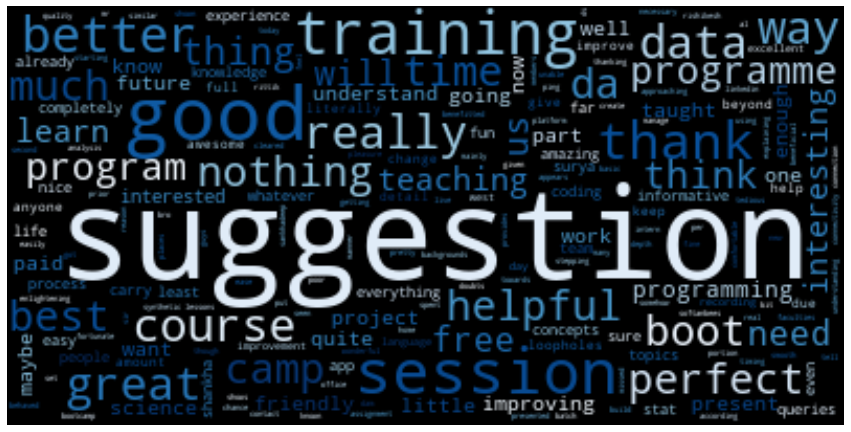

In [20]:
wordcloud_suggestion = WordCloud(background_color="black",max_font_size = 60, colormap='Blues',
                      collocations=False).generate(final_text_suggest)

plt.figure(figsize = (15,15))
plt.imshow(wordcloud_suggestion, interpolation='bilinear')
plt.axis("off")
plt.show()

# visualization

In [22]:
import seaborn as sns

C:\Users\User\anaconda3\envs\Bindu1\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


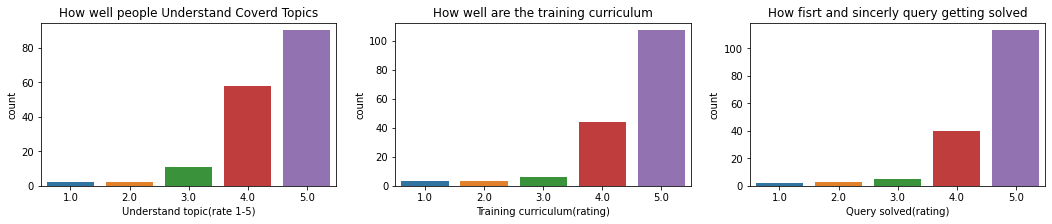

In [23]:
fig, ax =plt.subplots(1,3,figsize=(18,3))

sns.countplot(batch_info['Understand topic(rate 1-5)'], ax=ax[0])
ax[0].set_title('How well people Understand Coverd Topics')

sns.countplot(batch_info['Training curriculum(rating)'], ax=ax[1])
ax[1].set_title('How well are the training curriculum')

sns.countplot(batch_info['Query solved(rating)'],ax=ax[2])
ax[2].set_title('How fisrt and sincerly query getting solved')

fig.show()
#From the visualization everyone seem to be like the course curriculum as well as coverd topic and everyone satisfied with their query getting solved

# Finding correlation 

In [24]:
set_yes = {"Apply for paid internship?":{"Yes": 1}}
df=pd.DataFrame(batch_info,columns=['Apply for paid internship?','Understand topic(rate 1-5)'])
new_df=df.loc[df['Apply for paid internship?'] == 'Yes'].replace(set_yes)
new_df['Apply for paid internship?']=new_df['Apply for paid internship?'].astype('float')

In [25]:
new_df.head()

,Apply for paid internship?,Understand topic(rate 1-5)
0,1.0,5.0
3,1.0,4.0
4,1.0,5.0
6,1.0,5.0
7,1.0,5.0


In [26]:
new_df.corr(method='pearson')

,Apply for paid internship?,Understand topic(rate 1-5)
Apply for paid internship?,NaN,NaN
Understand topic(rate 1-5),NaN,1.0
